In [ ]:
# Alice Gee, ag67642
# Mohammad Aga, mba929
# Andrew Yang, ay6764

In [147]:
# numerical method to solve for the derived kinematic equation (in degrees)
def secant(f, a, b, tol, x, y, v, g):
    f_prime = (f(x, y, v, g, b)-f(x, y, v, g, a)) / (b-a)
    c = b - ((f(x, y, v, g, b)) / f_prime)
    while abs(f(x, y, v, g, c)) > tol:
        f_prime = (f(x, y, v, g, b) - f(x, y, v, g, a)) / (b-a)
        c = b - (f(x, y, v, g, b) / f_prime)
        a = b
        b = c
    return(c * 180 / np.pi)

In [148]:
# numerical method to solve for the derived kinematic equation (in radians)
def secant_v2(f, a, b, tol, x, y, v, g):
    f_prime = (f(x, y, v, g, b)-f(x, y, v, g, a)) / (b-a)
    c = b - ((f(x, y, v, g, b)) / f_prime)
    while abs(f(x, y, v, g, c)) > tol:
        f_prime = (f(x, y, v, g, b) - f(x, y, v, g, a)) / (b-a)
        c = b - (f(x, y, v, g, b) / f_prime)
        a = b
        b = c
    return(c)

In [149]:
# maximum x* values for all inital velocities; when y* = 0
import math
f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
a = 0
b = 3000
tol = 1e-6
y = 0
g = 9.8
theta = np.pi / 4
velocity_store = []
store = []
for v in range(100, 160, 10):
    f_prime = (f(b, y, v, g, theta)-f(a, y, v, g, theta)) / (b-a)
    c = b - ((f(b, y, v, g, theta)) / f_prime)
    while abs(f(c, y, v, g, theta)) > tol:
        f_prime = (f(b, y, v, g, theta) - f(a, y, v, g, theta)) / (b-a)
        c = b - (f(b, y, v, g, theta) / f_prime)
        a = b
        b = c
    velocity_store.append(v)
    store.append(c)
print(velocity_store)
print(store)

1020.408163265306
1234.6938775510203
1469.3877551020405
1724.4897959183672
1999.9999999999995
2295.9183673469383


In [ ]:
import matplotlib.pyplot as plt

def determinant(a, b, c, d):
    output = a*d - b*c
    return output

def linear_fit (data):
    n = len(data)
    sum_xi = 0
    sum_xi2 = 0 
    sum_yi = 0 
    sum_yi2 = 0
    sum_xiyi = 0
    for i in range(n):
        sum_xi += data[i][0]
        sum_xi2 += (data[i][0])**2
        sum_yi += data[i][1]
        sum_yi2 += (data[i][1])**2
        sum_xiyi += data[i][0] * data[i][1]
    delta = determinant(n, sum_xi, sum_xi, sum_xi2)
    a0 = determinant(sum_yi, sum_xi, sum_xiyi, sum_xi2) / delta
    a1 = determinant(n, sum_yi, sum_xi, sum_xiyi) / delta
    return (a0, a1)
  
data = []
for i in range(len(store)):
  data.append((velocity_store[i], store[i]))
# a0, a1 = linear_fit (data)[0], linear_fit(data)[1]
a0 = linear_fit(data)[0]
a1 = linear_fit(data)[1]
# plot the points and the best fit line
x = np.linspace(90,160, 10)
y = a0 + a1 * x
plt.plot(x, y)
plt.scatter(velocity_store, store)
plt.xlabel('Initial Velocity, v0 (m/s)')
plt.ylabel('Maximum x coordinate (m)')
plt.title(f"Initial Velocity vs. Maximum x coordinate")
plt.show()

In [150]:
import pandas as pd

## theta calculations for v0 = 100

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 100
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,1071, 51)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 1071, 51):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
            pass
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 1071, 51):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0      51     102     153     204     255     306     357     408  \
-100 -90.0 -61.610 -41.693 -29.052 -20.611 -14.512  -9.782  -5.899  -2.564   
-90  -90.0 -59.087 -38.672 -26.331 -18.279 -12.508  -8.036  -4.355  -1.179   
-80  -90.0 -56.102 -35.344 -23.451 -15.861 -10.455  -6.260  -2.791   0.220   
-70  -90.0 -52.538 -31.685 -20.413 -13.362  -8.355  -4.455  -1.207   1.633   
-60  -90.0 -48.243 -27.677 -17.223 -10.787  -6.213  -2.624   0.394   3.059   
-50  -90.0 -43.034 -23.313 -13.888  -8.143  -4.033  -0.770   2.010   4.495   
-40  -90.0 -36.702 -18.599 -10.422  -5.439  -1.821   1.104   3.639   5.940   
-30  -90.0 -29.054 -13.562  -6.844  -2.684   0.419   2.994   5.279   7.393   
-20  -90.0 -19.994  -8.253  -3.178   0.110   2.679   4.897   6.927   8.853   
-10  -90.0  -9.668  -2.745   0.551   2.931   4.954   6.809   8.581  10.317   
0      0.0   1.432   2.868   4.312   5.766   7.236   8.725  10.239  11.784   
10    90.0  88.560  87.117  85.667  84.205  82.727  81.229  79.7

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/20148950.py:7: RuntimeWarning: overflow encountered in double_scalars
  c = b - (f(x, y, v, g, b) / f_prime)
/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/335300601.py:5: RuntimeWarning: invalid value encountered in cos
  f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/335300601.py:5: RuntimeWarning: invalid value encountered in sin
  f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x


In [151]:
# average error for theta calculations at v0 = 100 m/s 
v = 100
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(-100, 10, 10):
    for x in range(0, 1071, 51):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
        
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 1071, 51):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
        
        
print(np.nanmean(diff_store))

7.907509760035124e-09


/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/3580778191.py:7: RuntimeWarning: overflow encountered in double_scalars
  c = b - (f(x, y, v, g, b) / f_prime)
/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/335300601.py:5: RuntimeWarning: invalid value encountered in cos
  f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_2574/335300601.py:5: RuntimeWarning: invalid value encountered in sin
  f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x


In [152]:
# theta calculations for v0 = 110

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 110
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,1240, 62)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 1240, 62):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 1240, 62):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0      62     124     186     248     310     372     434     496  \
-100 -90.0 -56.816 -36.111 -24.096 -16.389 -10.890  -6.625  -3.099  -0.043   
-90  -90.0 -54.047 -33.189 -21.638 -14.354  -9.175  -5.147  -1.801   1.116   
-80  -90.0 -50.829 -30.035 -19.074 -12.265  -7.429  -3.650  -0.491   2.284   
-70  -90.0 -47.068 -26.641 -16.409 -10.128  -5.656  -2.137   0.831   3.460   
-60  -90.0 -42.655 -23.006 -13.648  -7.944  -3.858  -0.609   2.162   4.643   
-50  -90.0 -37.473 -19.135 -10.800  -5.721  -2.039   0.932   3.502   5.832   
-40  -90.0 -31.412 -15.042  -7.874  -3.462  -0.200   2.485   4.850   7.027   
-30  -90.0 -24.399 -10.753  -4.882  -1.174   1.654   4.047   6.204   8.226   
-20  -90.0 -16.451  -6.303  -1.840   1.136   3.519   5.616   7.563   9.429   
-10  -90.0  -7.729  -1.740   1.237   3.461   5.393   7.190   8.925  10.635   
0      0.0   1.439   2.882   4.332   5.794   7.271   8.768  10.290  11.843   
10    90.0  88.555  87.106  85.650  84.182  82.699  81.195  79.6

In [153]:
# average error for theta calculations at v0 = 110 m/s 
v = 110
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(-100, 10, 10):
    for x in range(0, 1240, 62):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    for x in range(0, 1240, 62):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass

        
print(np.nanmean(diff_store))

1.3817908475590602e-08


In [154]:
# theta calculations for v0 = 120

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 120
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,1480, 74)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 1480, 74):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 1480, 74):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0      74     148     222     296     370     444     518     592  \
-100 -90.0 -52.101 -31.248 -20.045 -13.046  -8.073  -4.194  -0.959   1.875   
-90  -90.0 -49.171 -28.498 -17.850 -11.273  -6.597  -2.932   0.144   2.858   
-80  -90.0 -45.825 -25.578 -15.586  -9.467  -5.104  -1.659   1.255   3.846   
-70  -90.0 -41.998 -22.489 -13.256  -7.630  -3.593  -0.376   2.372   4.838   
-60  -90.0 -37.621 -19.235 -10.866  -5.765  -2.067   0.916   3.496   5.835   
-50  -90.0 -32.626 -15.824  -8.420  -3.875  -0.528   2.216   4.625   6.836   
-40  -90.0 -26.969 -12.272  -5.927  -1.964   1.022   3.523   5.758   7.840   
-30  -90.0 -20.639  -8.597  -3.395  -0.036   2.581   4.836   6.895   8.847   
-20  -90.0 -13.690  -4.825  -0.833   1.905   4.147   6.152   8.035   9.856   
-10  -90.0  -6.258  -0.985   1.751   3.856   5.718   7.472   9.177  10.867   
0      0.0   1.443   2.890   4.345   5.811   7.292   8.794  10.321  11.879   
10    90.0  88.552  87.100  85.640  84.169  82.682  81.174  79.6

In [155]:
# average error for theta calculations at v0 = 120 m/s 
v = 120
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(-100, 10, 10):
    for x in range(0, 1480, 74):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
    
a = np.pi/4
b = np.pi/2
for y in range(-100, 10, 10):
    for x in range(0, 1480, 74):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass

        
print(np.nanmean(diff_store))

4.129238533446355e-08


In [156]:
## theta calculations for v0 = 130 m/s

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 130
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,1740, 87)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 1740, 87):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 1740, 87):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0      87     174     261     348     435     522     609     696  \
-100 -90.0 -47.571 -27.071 -16.732 -10.375  -5.849  -2.289   0.710   3.366   
-90  -90.0 -44.561 -24.527 -14.782  -8.827  -4.572  -1.203   1.658   4.208   
-80  -90.0 -41.186 -21.861 -12.786  -7.258  -3.283  -0.109   2.610   5.054   
-70  -90.0 -37.402 -19.076 -10.747  -5.668  -1.984   0.991   3.566   5.902   
-60  -90.0 -33.171 -16.179  -8.668  -4.062  -0.675   2.097   4.526   6.754   
-50  -90.0 -28.461 -13.178  -6.554  -2.439   0.642   3.207   5.489   7.607   
-40  -90.0 -23.262 -10.084  -4.411  -0.803   1.966   4.323   6.456   8.463   
-30  -90.0 -17.592  -6.912  -2.242   0.843   3.295   5.441   7.424   9.321   
-20  -90.0 -11.509  -3.678  -0.055   2.498   4.629   6.562   8.395  10.180   
-10  -90.0  -5.115  -0.402   2.146   4.158   5.967   7.686   9.367  11.040   
0      0.0   1.446   2.895   4.353   5.821   7.305   8.810  10.340  11.902   
10    90.0  88.550  87.096  85.635  84.162  82.673  81.163  79.6

In [157]:
# average error for theta calculations at v0 = 130 m/s 
v = 130
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(10, 110, 10):
    for x in range(0, 1740, 87):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    for x in range(0, 1740, 87):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass

        
print(np.nanmean(diff_store))

3.671406182722493e-08


In [158]:
## theta calculations for v0 = 140 m/s

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 140
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,2000, 100)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 2000, 100):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 2000, 100):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0     100     200     300     400     500     600     700     800  \
-100 -90.0 -43.601 -23.764 -14.226  -8.408  -4.250  -0.952   1.851   4.355   
-90  -90.0 -40.585 -21.420 -12.480  -7.039  -3.127   0.000   2.680   5.091   
-80  -90.0 -37.254 -18.987 -10.702  -5.655  -1.996   0.957   3.512   5.829   
-70  -90.0 -33.583 -16.469  -8.894  -4.258  -0.858   1.919   4.347   6.569   
-60  -90.0 -29.552 -13.872  -7.060  -2.848   0.287   2.884   5.184   7.311   
-50  -90.0 -25.150 -11.202  -5.202  -1.429   1.437   3.853   6.024   8.054   
-40  -90.0 -20.382  -8.469  -3.324   0.000   2.591   4.824   6.865   8.799   
-30  -90.0 -15.277  -5.683  -1.429   1.436   3.750   5.798   7.708   9.545   
-20  -90.0  -9.884  -2.855   0.478   2.877   4.911   6.774   8.552  10.292   
-10  -90.0  -4.281   0.000   2.393   4.322   6.074   7.751   9.398  11.040   
0      0.0   1.433   2.870   4.313   5.768   7.239   8.729  10.244  11.789   
10    90.0  88.563  87.123  85.676  84.217  82.742  81.248  79.7

In [159]:
# average error for theta calculations at v0 = 140 m/s 
v = 140
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(10, 110, 10):
    for x in range(0, 2000, 100):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    for x in range(0, 2000, 100):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass

        
print(np.nanmean(diff_store))

2.980305092184862e-08


In [160]:
## theta calculations for v0 = 150 m/s

f = lambda x, y, v, g, theta: (v * np.cos(theta))* ((v * np.sin(theta) + math.sqrt(v**2*(np.sin(theta)**2)-2*g*y))/ g) - x
v = 150
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

column_store = []
score_matrix = []
column_names = [str(x) for x in range(0,2300, 115)]
row_names = [str(y) for y in range(-100,110, 10)]

for y in range(-100, 10, 10):
    column_store = []
    for x in range(0, 2300, 115):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    column_store = []
    for x in range(0, 2300, 115):
        try:
            theta = secant(f, a, b, tol, x, y, v, g)
            column_store.append(round(theta, 3))
        except ValueError:
            column_store.append("Out of Range")
    score_matrix.append(column_store)

df = pd.DataFrame(score_matrix, columns = column_names, index = row_names)
print(df)

         0     115     230     345     460     575     690     805     920  \
-100 -90.0 -39.604 -20.684 -11.935  -6.609  -2.771   0.306   2.951   5.336   
-90  -90.0 -36.639 -18.550 -10.382  -5.403  -1.786   1.140   3.675   5.979   
-80  -90.0 -33.413 -16.353  -8.808  -4.186  -0.795   1.976   4.401   6.622   
-70  -90.0 -29.914 -14.096  -7.213  -2.961   0.200   2.816   5.130   7.268   
-60  -90.0 -26.136 -11.783  -5.600  -1.728   1.199   3.658   5.859   7.914   
-50  -90.0 -22.078  -9.421  -3.972  -0.488   2.202   4.502   6.591   8.562   
-40  -90.0 -17.756  -7.016  -2.330   0.758   3.208   5.348   7.323   9.210   
-30  -90.0 -13.195  -4.575  -0.677   2.009   4.217   6.196   8.057   9.859   
-20  -90.0  -8.436  -2.108   0.985   3.264   5.227   7.045   8.792  10.510   
-10  -90.0  -3.537   0.379   2.651   4.521   6.239   7.894   9.527  11.160   
0      0.0   1.436   2.875   4.321   5.779   7.252   8.745  10.263  11.811   
10    90.0  88.561  87.119  85.669  84.208  82.732  81.235  79.7

In [161]:
# average error for theta calculations at v0 = 150 m/s 
v = 150
g = 9.8
a = 0 
b = np.pi/4
tol = 1e-6

diff_store = []

for y in range(10, 110, 10):
    for x in range(0, 2300, 115):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
    
a = np.pi/4
b = np.pi/2
for y in range(10, 110, 10):
    for x in range(0, 2300, 115):
        try:
            theta = secant_v2(f, a, b, tol, x, y, v, g)
            diff_store.append(f(x, y, v, g, theta))
        except ValueError:
            pass
        
print(np.nanmean(diff_store))

2.1553093001743655e-08


In [162]:
# create class to simulate the motion of artillery projection 
from math import sin, cos, radians
import matplotlib.pyplot as plt

class ProjectileMotion:
    def __init__(self, v, x0, y0, theta):
        # set initial (x,y) coordinates 
        self.x, self.y = x0, y0
        
        # set initial velocity for x and y axes
        self.vx, self.vy = v*cos(radians(theta)), v*sin(radians(theta))
        
        # acceleration for x and y axes
        self.ax, self.ay = 0, -9.8
        
        # initialize time
        self.time = 0
        
        # initialize lists to store x and y coordinates
        self.xstore, self.ystore = [self.x], [self.y]
      
    def update_x_velocity(self, dt):
        self.vx += self.ax*dt
        return self.vx
    
    def update_x_coordinate(self, dt):
        self.x += 0.5*(self.vx + self.update_x_velocity(dt))*dt
        return self.x
        
    def update_y_velocity(self, dt):
        self.vy += self.ay*dt
        return self.vy

    def update_y_coordinate(self, dt):
        self.y += 0.5*(self.vy + self.update_y_velocity(dt))*dt
        return self.y
       
    def step(self, dt):
        self.xstore.append(self.update_x_coordinate(dt))
        self.ystore.append(self.update_y_coordinate(dt))
        self.time += dt
          
    def launch(x0, y0, v, theta):
        """
        Returns a tuple with sequential pairs of x and y coordinates
        """
        artillery = ProjectileMotion(x0, y0, v, theta)
        dt = 0.01 
        t = 0 
        artillery.step(dt)
        while artillery.y >= -100:
            artillery.step(dt)
            t += dt
        return (artillery.xstore, artillery.ystore)

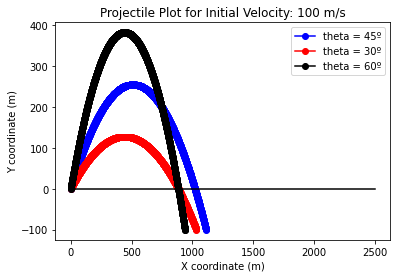

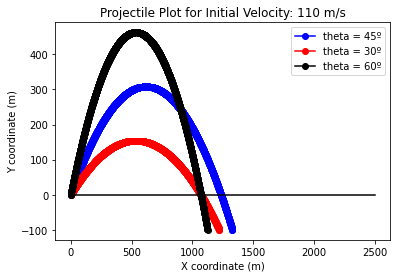

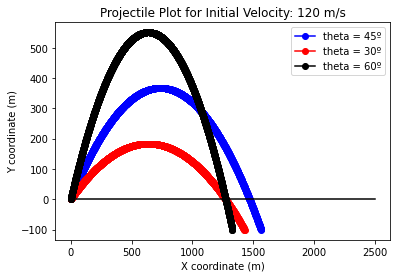

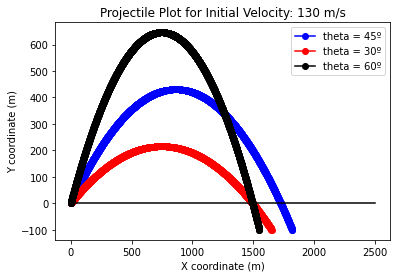

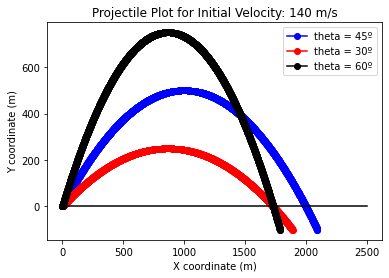

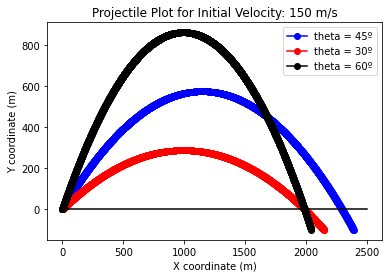

In [163]:
# print out the projectile plots
for velocity in range(100, 160, 10):
    x0, y0 = 0, 0
    x_45, y_45 = ProjectileMotion.launch(velocity, x0, y0, 45)
    x_30, y_30 = ProjectileMotion.launch(velocity, x0, y0, 30)
    x_60, y_60 = ProjectileMotion.launch(velocity, x0, y0, 60)
    plt.plot(x_45, y_45, 'bo-', x_30, y_30, 'ro-', x_60, y_60, 'ko-', [0, 2500], [0,0], 'k-')
    plt.legend(['theta = 45º', 'theta = 30º', 'theta = 60º'])
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.title(f"Projectile Plot for Initial Velocity: {velocity} m/s")
    plt.show()